In [1]:
from keras.layers import Input, Dense
from keras.models import Model


# size of encoded representations
encoding_dim = 32


# input placeholder
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded- lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


This code builds a simple autoencoder using Keras to compress and reconstruct images from the Fashion MNIST dataset. The autoencoder consists of an input layer that accepts flattened 28×28 grayscale images (784 pixels), an encoder layer that reduces the input to a 32-dimensional representation using ReLU activation, and a decoder layer that reconstructs the original input using a sigmoid activation function. The model is compiled with the Adam optimizer and binary crossentropy loss, suitable for pixel values normalized between 0 and 1. The Fashion MNIST dataset is loaded and a smaller subset (6000 training and 1000 testing samples) is used for quicker execution. The image data is normalized and reshaped from 2D to 1D to match the input layer of the network. The primary goal of this autoencoder is to learn a compressed representation of the input images and then reconstruct them as accurately as possible from that lower-dimensional space.

In [2]:
#Fitting the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0022 - loss: 0.6416 - val_accuracy: 0.0030 - val_loss: 0.4697
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0033 - loss: 0.4447 - val_accuracy: 0.0090 - val_loss: 0.3981
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0072 - loss: 0.3837 - val_accuracy: 0.0130 - val_loss: 0.3746
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0130 - loss: 0.3670 - val_accuracy: 0.0100 - val_loss: 0.3563
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0104 - loss: 0.3504 - val_accuracy: 0.0150 - val_loss: 0.3447


This line of code trains the autoencoder model using the training data (`x_train`) as both input and target, since the goal is to reconstruct the input. It runs for 5 epochs with a batch size of 128, shuffles the data each epoch for better training, and evaluates the model's performance using the test set (`x_test`).

In [3]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


This line uses the trained autoencoder to generate reconstructed (predicted) versions of the test images stored in `x_test`, and stores the output in the `prediction` variable.

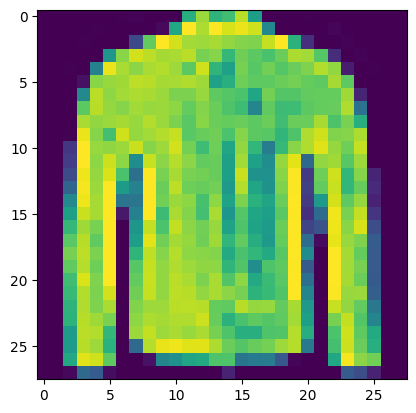

In [4]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

This code displays the 51st test image from the dataset (`x_test[50]`) by reshaping it back to its original 28×28 format and plotting it using Matplotlib.

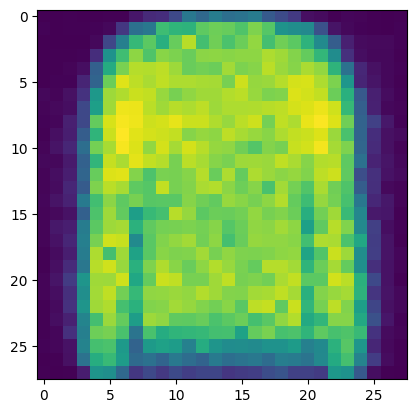

In [5]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

This code visualizes the reconstructed version of the 51st test image (`prediction[50]`) by reshaping it to 28×28 and displaying it with Matplotlib, allowing comparison with the original image.

In [6]:
# ADDING ONE MORE HIDDEN LAYER

input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.0093 - loss: 0.3775 - val_accuracy: 0.0159 - val_loss: 0.2939
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.0175 - loss: 0.2888 - val_accuracy: 0.0223 - val_loss: 0.2853
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.0243 - loss: 0.2823 - val_accuracy: 0.0251 - val_loss: 0.2817
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.0255 - loss: 0.2782 - val_accuracy: 0.0270 - val_loss: 0.2792
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.0291 - loss: 0.2768 - val_accuracy: 0.0326 - val_loss: 0.2773


This code builds and trains an enhanced autoencoder for the Fashion MNIST dataset by adding an extra hidden layer in both the encoder and decoder sections. The input images (28×28) are flattened to 784 features and normalized. The encoder compresses the input through a 512-neuron hidden layer followed by a 32-dimensional encoded layer. The decoder mirrors this structure, expanding the encoded representation back to the original input size using another 512-neuron hidden layer and a final output layer with sigmoid activation. The model is trained for 5 epochs using a batch size of 128 to reconstruct the original images from their compressed representations.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


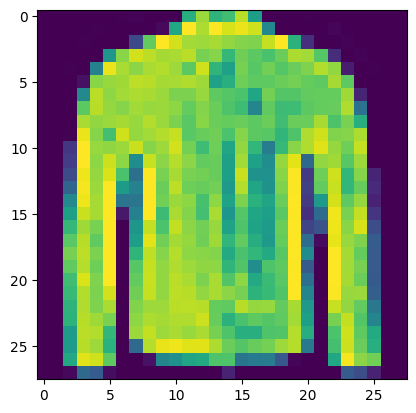

In [7]:
# Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

#predicting on the test data
prediction = autoencoder.predict(x_test)

#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()


This code first uses the trained autoencoder to reconstruct the test images and stores the output in `prediction`. Then, it visualizes the original 51st test image (`x_test[50]`) by reshaping it to its original 28×28 format and displaying it using Matplotlib. The final `plt.show()` command renders the image on screen.

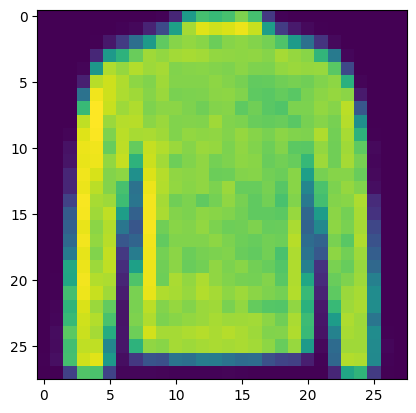

In [8]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

The code visualizes the 50th image from the `prediction` array, reshaped to 28x28 pixels, and shows it using `matplotlib`.

In [9]:
# Repeat the question 2 on the denoisening autoencoder

from keras.layers import Input, Dense
from keras.models import Model


# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
     # this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


The code defines a denoising autoencoder using Keras. It creates a simple autoencoder model with a 32-dimensional encoding layer and a reconstruction layer. The model is compiled using the Adam optimizer and binary cross-entropy loss. The data is loaded from the Fashion MNIST dataset, scaled to float values between 0 and 1, and reshaped from 28x28 images to 784-dimensional vectors.

In [10]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

The code adds Gaussian noise to the training and test data. It generates random noise with a mean of 0 and a standard deviation of 1, scaled by a factor of 0.5, and adds it to the `x_train` and `x_test` datasets to create `x_train_noisy` and `x_test_noisy`.

In [11]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0028 - loss: 0.6719 - val_accuracy: 0.0010 - val_loss: 0.5509
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0020 - loss: 0.5212 - val_accuracy: 0.0010 - val_loss: 0.4552
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0026 - loss: 0.4419 - val_accuracy: 0.0000e+00 - val_loss: 0.4116
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0048 - loss: 0.4059 - val_accuracy: 0.0030 - val_loss: 0.3922
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0051 - loss: 0.3889 - val_accuracy: 0.0040 - val_loss: 0.3805
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0108 - loss: 0.3781 - val_accuracy: 0.0030 - val_loss: 0.3707
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0112 - loss: 0.3666 - val_accuracy: 0.0030 - val_loss: 0.3615
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0093 - loss: 0.3610 - val_accuracy: 0.0050

The code trains the autoencoder model on noisy training data (`x_train_noisy`) to reconstruct the original clean images (`x_train`). It runs for 10 epochs with a batch size of 256, shuffling the data and using noisy test data (`x_test_noisy`) for validation.

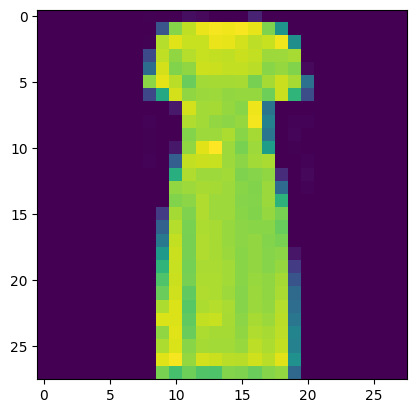

In [12]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

The code displays the 50th image from the original training data (`x_train`) before noise is applied, reshaped to a 28x28 pixel format.

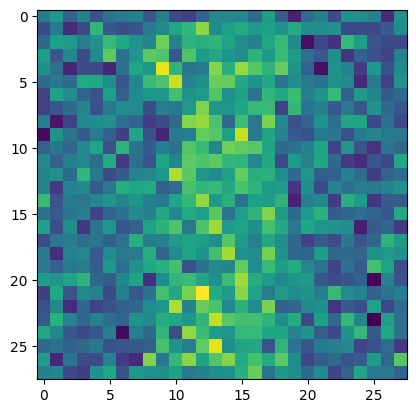

In [13]:

#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

The code displays the 50th image from the noisy training data (`x_train_noisy`), reshaped to a 28x28 pixel format, showing the effect of the added noise.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


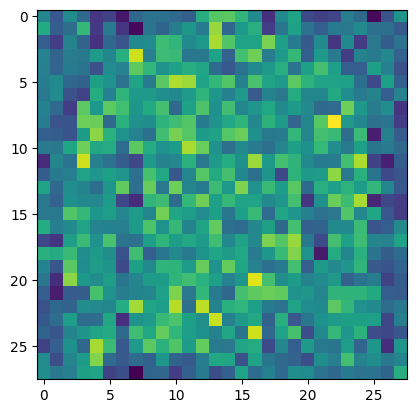

In [14]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()

The code predicts the denoised output for the noisy test data (`x_test_noisy`) using the trained autoencoder. It then displays the 50th noisy image from the test set before prediction.

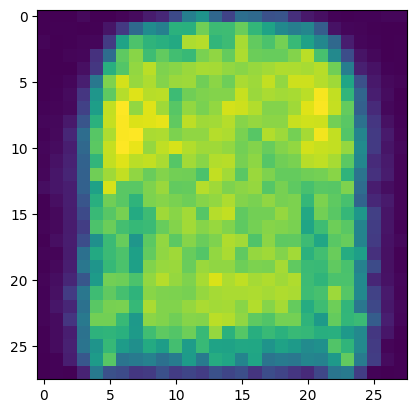

In [15]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

The code displays the 50th reconstructed image from the autoencoder's prediction, reshaped to a 28x28 pixel format, showing the denoised output after the model's prediction.

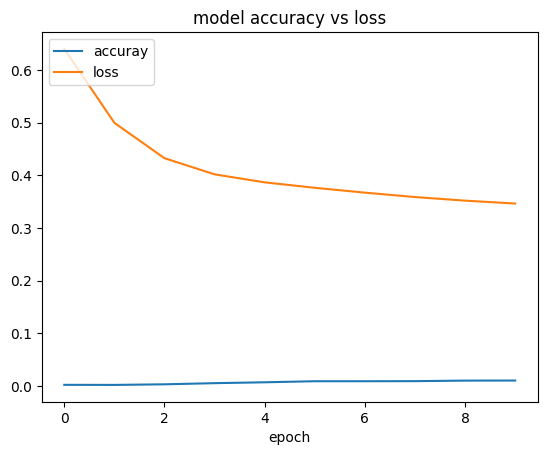

In [16]:

# plot loss and accuracy using the history object

autoencoder.metrics_names

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

The code plots the accuracy and loss of the autoencoder model over the training epochs using data stored in the `history` object. It visualizes the change in accuracy and loss during training with labels and a legend.